In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Read in the data
df = pd.read_csv("/Users/grahamwaters/Library/CloudStorage/GoogleDrive-gewaters2@gmail.com/My Drive/Lightsonthehorizon/project_folder/data/processed/ufos_processed.csv", low_memory=False, on_bad_lines= 'skip')

# Convert the latitude and longitude to radians
df['latitude_rad'] = np.radians(df['latitude'])
df['longitude_rad'] = np.radians(df['longitude'])

# Convert the latitude and longitude to cartesian coordinates
df['x'] = np.cos(df['latitude_rad']) * np.cos(df['longitude_rad']) # x = r * cos(lat) * cos(long)
df['y'] = np.cos(df['latitude_rad']) * np.sin(df['longitude_rad']) # y = r * cos(lat) * sin(long)
df['z'] = np.sin(df['latitude_rad']) # z = r * sin(lat)

# Create a matrix of the x, y, and z coordinates
X = df[['x', 'y', 'z']].values

In [4]:
print(f'The shape of the matrix is: {X.shape}')
# Scale the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The shape of the matrix is: (79614, 3)


In [5]:
cell_active = False

if cell_active:
    print(f'Calculating the distance matrix...')
    # Calculate the condensed distance matrix
    # if it already exists in models/pickles/ in the project_folder, load it
    try:
        print("Trying to load the distance matrix from models/pickles/ in the project_folder...")
        distances = np.load('../models/pickles/distances.npy')
    except Exception as e:
        print("Distance matrix not found. {e}\nCalculating the distance matrix...")
        distances = pdist(X_scaled)
        # save the distances as a pickle file to models/pickles/ in the project_folder
        np.save('../models/pickles/distances.npy', distances)


In [6]:

# Calculate the distance to the kth nearest neighbor for each point
k = 5
print(f'Calculating the distance to the {k}th nearest neighbor for each point...')
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances_k, indices_k = nbrs.kneighbors(X_scaled)
distances_k = distances_k[:, k-1]

Calculating the distance to the 5th nearest neighbor for each point...


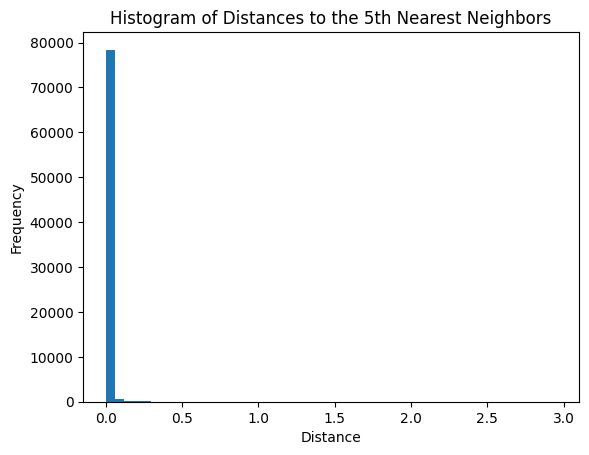

In [7]:

# Plot a histogram of the distances to the kth nearest neighbor
plt.hist(distances_k, bins=50)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances to the 5th Nearest Neighbors')
# save the figure as a .png file in the project_folder/reports folder with the name 'knn_histogram.png'
plt.savefig('/Users/grahamwaters/Library/CloudStorage/GoogleDrive-gewaters2@gmail.com/My Drive/Lightsonthehorizon/project_folder/reports/knn_histogram.png')
plt.show()


In [9]:
import numpy as np
from tqdm import tqdm
# Choose a value for eps using the elbow method
print(f'Calculating the silhouette score for different values of eps...')
eps_values = np.arange(0.1, 1.0, 0.1)
silhouette_scores = []
for eps in tqdm(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, dbscan.labels_))

# Plot the silhouette scores for different values of eps
plt.plot(eps_values, silhouette_scores)
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of Eps')
# save the figure as a .png file in the project_folder/reports folder with the name 'silhouette_scores.png'
plt.savefig('saved.png')
plt.show();
eps = 0.5

Calculating the silhouette score for different values of eps...


 11%|█         | 1/9 [01:06<08:49, 66.15s/it]


KeyboardInterrupt: 

In [ ]:

# print(f'Running DBSCAN with eps = {eps}...')
# # Run the DBSCAN algorithm
# db = DBSCAN(eps=eps, min_samples=2, metric='precomputed')
# db.fit(squareform(distances))
# print(f'The number of clusters is: {len(set(db.labels_))}')
# # Calculate the silhouette score
# score = silhouette_score(squareform(distances), db.labels_)
# print(f'The silhouette score is: {score}')
# # Calculate the Calinski-Harabasz score
# score = calinski_harabasz_score(squareform(distances), db.labels_)
# print(f'The Calinski-Harabasz score is: {score}')
# # Print the cluster labels
# print(db.labels_)

Running DBSCAN with eps = 0.5...


: 

: 

#### Extras

In [10]:
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.3 MB/s eta 0:00:00


In [12]:
from geopy.distance import haversine

# Coordinates of New York City in decimal degrees
nyc_lat = 40.7128
nyc_lon = -74.0060

# Coordinates of Los Angeles in decimal degrees
la_lat = 34.0522
la_lon = -118.2437

# Calculate the distance between the two points in kilometers
distance = haversine((nyc_lat, nyc_lon), (la_lat, la_lon))
print(f'The distance between New York City and Los Angeles is {distance:.2f} kilometers')


ImportError: cannot import name 'haversine' from 'geopy.distance' (/opt/anaconda3/envs/groupme/lib/python3.9/site-packages/geopy/distance.py)

# Clusters Defined (for reference)

A cluster is defined as a set of points (reports of UAPs) that fall within the circle formed by rotating a radial line that is `d` units long in a circle around a central point `p`. These points within the cluster are considered to be "neighbors" of `p` and their reports are to be examined against the central point `p` in conjunction with the consideration of another dimension (time) to determine if the reports are part of the same UAP event, and how credible the descriptions are based on common features (e.g. color, shape, etc.).

